1. 목표
   - 선형회귀이론 및 선형회귀모델을 이해해보자.
   - Linear 모델을 활용하여 집값을 예측해보자!!

## 집 가격 데이터 예측
- 데이터 로드

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 데이터 가져오기
house_data = pd.read_csv('data/melb_data.csv')
house_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [6]:
# 데이터 정보 확인
house_data.info()

# 입력 특성, 정답 특성
# 결측치 확인 -> Non-null 확인(왜? 기계학습시 결측치 있으면 학습 불가)
# DType 확인 (왜? 문자형, 범주형 형태의 데이터는 학습XX -> 수치형 데이터로 변경 -> 인코딩)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Suburb: 주택이 위치한 교외 지역의 이름<br>
Address: 주택의 주<br>소
Rooms: 주택의 방 <br>개수
Type: 주택 유형 (h: 주택, u: 유닛, t: 타운하<br>우스)
Price: 주<br>택 가격
Method: 판매 방법 (S: 매매, SP: 매매 후 가격 공개, PI: 경매 전에 가격, VB: 경매 후 가<br>격 공개)
SellerG: 판매 대행 부동산 중<br>개인의 이름
Date<br>: 판매 날짜
Distance: 주택이 CBD (중심 업무 지구)에서 떨어진 거리 (<br>킬로미터 단위)
Postc<br>ode: 우편번호
Bedroom2: 주택의 침실 개수 (2개의 <br>침실을 갖춘 주택)
Bathroom<br>: 주택의 욕실 개수
Car: <br>주차 가능한 자동차 수
Landsize: 대지 <br>면적 (평방 미터 단위)
BuildingArea: 건축<br> 면적 (평방 미터 단위)
YearBu<br>ilt: 주택이 건축된 연도
Co<br>uncilArea: 관할 구역
<br>Lattitude: 주택의 위도
<br>Longtitude: 주택의 경도<br>
Regionname: 지역 이름
Propert<br>ycount: 지역 내의 부동산 개수

In [12]:
# 결측치가 있는 특성 확인
house_data.isnull().sum().sort_values(ascending = False)

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Suburb              0
Bathroom            0
Regionname          0
Longtitude          0
Lattitude           0
Landsize            0
Bedroom2            0
Address             0
Postcode            0
Distance            0
Date                0
SellerG             0
Method              0
Price               0
Type                0
Rooms               0
Propertycount       0
dtype: int64

### EDA 탐색적 데이터 분석
- 기술통계량 확인, 시각화

In [13]:
# 기술통계량 확인
house_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


<Axes: xlabel='Rooms', ylabel='Price'>

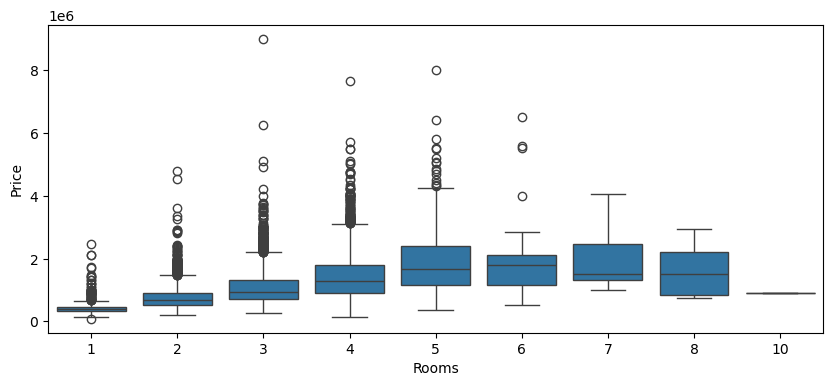

In [15]:
# Rooms 방의 개수에 따른 주택가격의 분포 현황
plt.figure(figsize=(10,4))
sns.boxplot(x="Rooms",y="Price",data = house_data)

# 방 개수가 증가할 수록 주택 가격의 중앙값이 상승
# 6개 이상은 의미가 없어보임.

In [17]:
# 방이 3개일 때 이상치의 개수 확인
# house_data에서 방의 개수가 3인 데이터만 추출
# 불리언인덱싱
house_data[house_data["Rooms"] == 3].describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,5881.0,5.881000e+03,5881.000000,5881.000000,5881.000000,5881.000000,5852.000000,5881.000000,2967.000000,3336.000000,5881.000000,5881.000000,5881.000000
mean,3.0,1.076081e+06,11.003690,3099.933175,2.984696,1.473219,1.697881,597.700731,139.147184,1962.539269,-37.802929,144.987706,7311.337018
std,0.0,5.021061e+05,6.014566,91.307033,0.337715,0.564848,0.943259,5855.388012,63.043612,38.510463,0.084351,0.113417,4443.401465
min,3.0,2.830000e+05,1.200000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,3.0,7.250000e+05,7.000000,3042.000000,3.000000,1.000000,1.000000,258.000000,111.000000,1940.000000,-37.853100,144.909200,3873.000000
50%,3.0,9.500000e+05,10.500000,3075.000000,3.000000,1.000000,2.000000,472.000000,129.000000,1965.000000,-37.792700,144.996810,6482.000000
75%,3.0,1.320000e+06,13.800000,3146.000000,3.000000,2.000000,2.000000,636.000000,152.000000,1997.000000,-37.743510,145.060410,9758.000000
max,3.0,9.000000e+06,45.900000,3977.000000,20.000000,6.000000,10.000000,433014.000000,1041.000000,2017.000000,-37.408530,145.526350,21650.000000


In [18]:
# type에 따른 가격의 평균 확인
house_data["Type"].unique()

array(['h', 'u', 't'], dtype=object)

<Axes: xlabel='Type'>

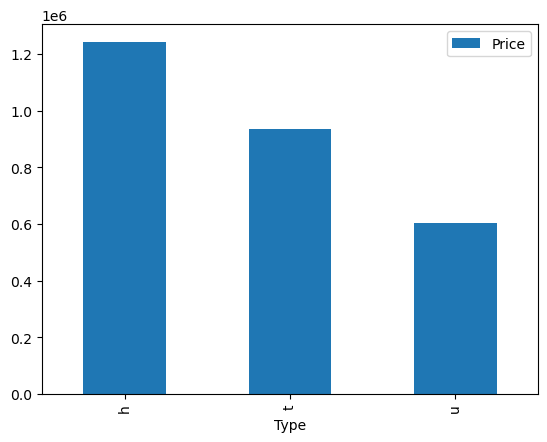

In [21]:
# 타입별 주택 평균 가격 확인
house_data[['Type','Price']].groupby(by='Type').mean().plot(kind="bar")

<Axes: xlabel='Lattitude', ylabel='Price'>

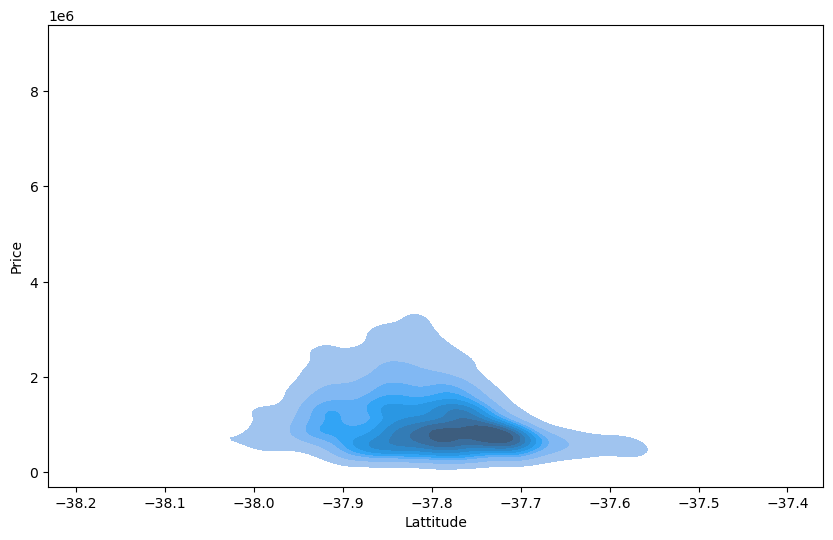

In [23]:
# 위도와 가격에 따른 밀도 확인 -> kdeplot(커널 밀도 추정 그래프)
plt.figure(figsize=(10,6))
sns.kdeplot(x="Lattitude", y="Price", data = house_data, fill = True)

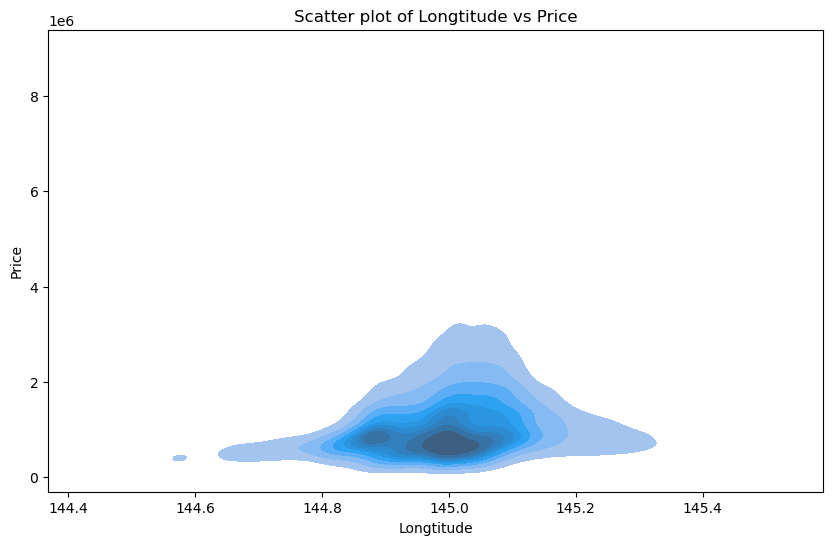

In [25]:
# 경도와 가격에 따른 밀도 확인 -> kdeplot(커널 밀도 추정 그래프)
plt.figure(figsize=(10,6))
sns.kdeplot(x="Longtitude", y="Price", data = house_data, fill = True)
plt.title("Scatter plot of Longtitude vs Price")
plt.show()

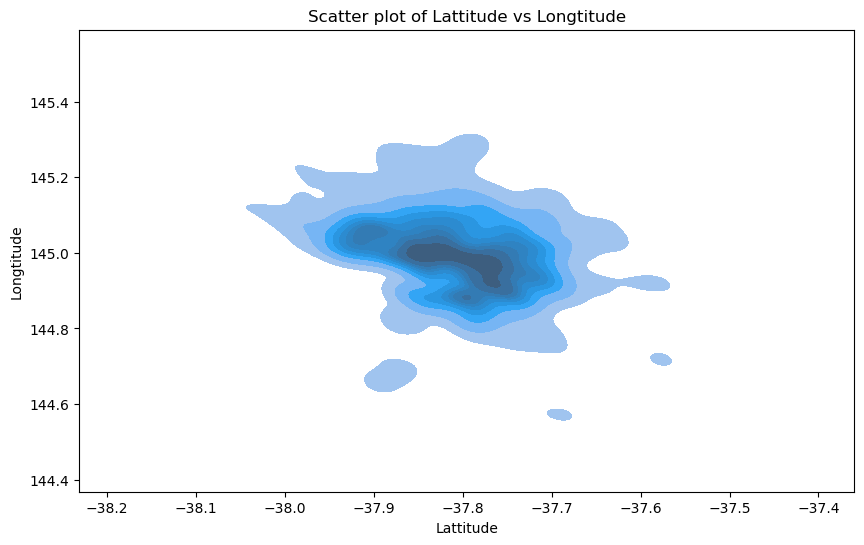

In [27]:
# 경도와 가격에 따른 밀도 확인 -> kdeplot(커널 밀도 추정 그래프)
plt.figure(figsize=(10,6))
sns.kdeplot(x="Lattitude", y="Longtitude", data = house_data, fill = True)
plt.title("Scatter plot of Lattitude vs Longtitude")
plt.show()

In [28]:
# councilarea 값 확인
house_data['CouncilArea'].unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [29]:
len(house_data['CouncilArea'].unique())

34

<Axes: xlabel='count', ylabel='CouncilArea'>

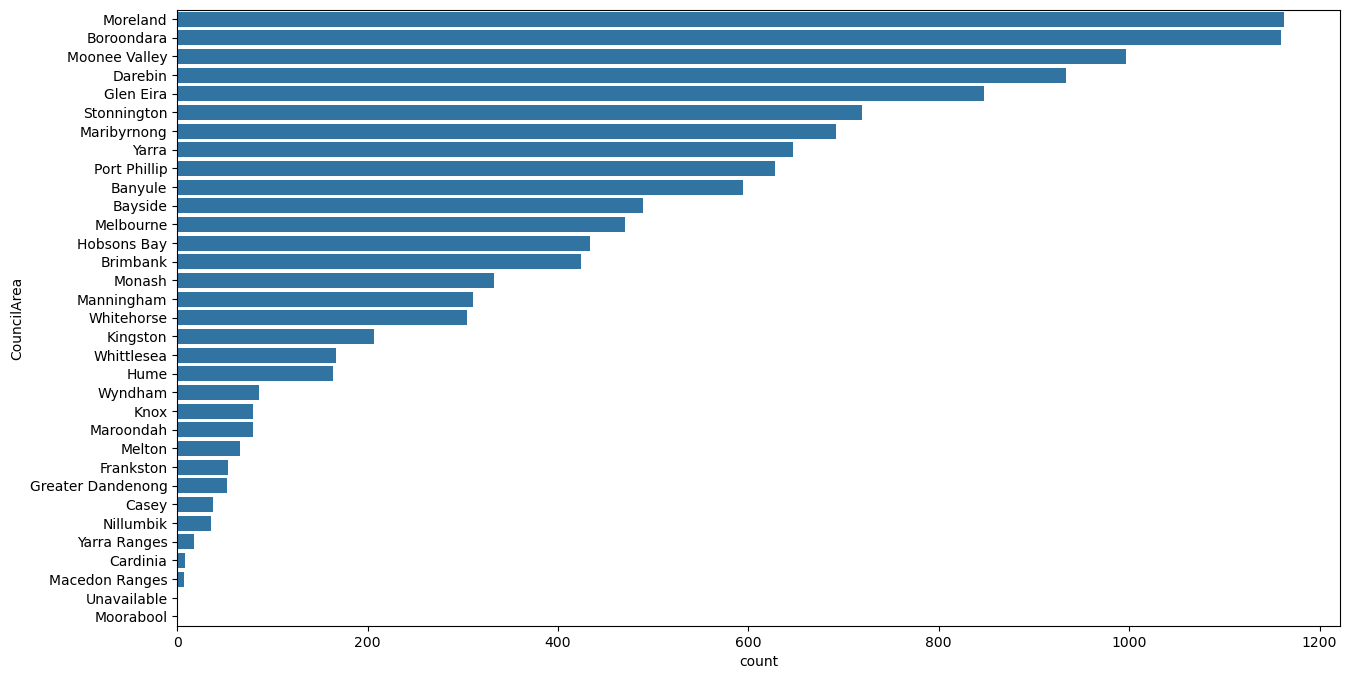

In [31]:
# 관할 구역별(CouncilArea)로 주택의 수 분포 확인
plt.figure(figsize=(15,8))
sns.countplot( y = 'CouncilArea' , data = house_data, order = house_data['CouncilArea'].value_counts().index) # 인덱스의 순서대로 나옴.

In [35]:
# 결측치를 특정한 값으로 채워주는 함수 -> fillna()
house_data['CouncilArea'].fillna('MoreLand', inplace = True)

In [37]:
house_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,MoreLand,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,MoreLand,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,MoreLand,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,MoreLand,-37.85908,144.89299,Western Metropolitan,6380.0
